# **ASSIGMENT-5**

**........................................................**

***NAME   : MAYALURI ANUSHA***

***REG.NO : 21BCE9143***

***BRANCH : CSE with Spec in AIML***

***CAMPUS : VIT-AP***

***EVENING BATCH : 6:00pm-8:00pm***

**........................................................**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the Data Set**

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Understanding the dataset**

In [4]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [5]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [8]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
data=data.drop([ 'CustomerID'] , axis =1 )

**Pre Processing the dataset**

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
data['Gender']= le.fit_transform(data['Gender'])

In [12]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [13]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [14]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


**Visualizations**

<Axes: >

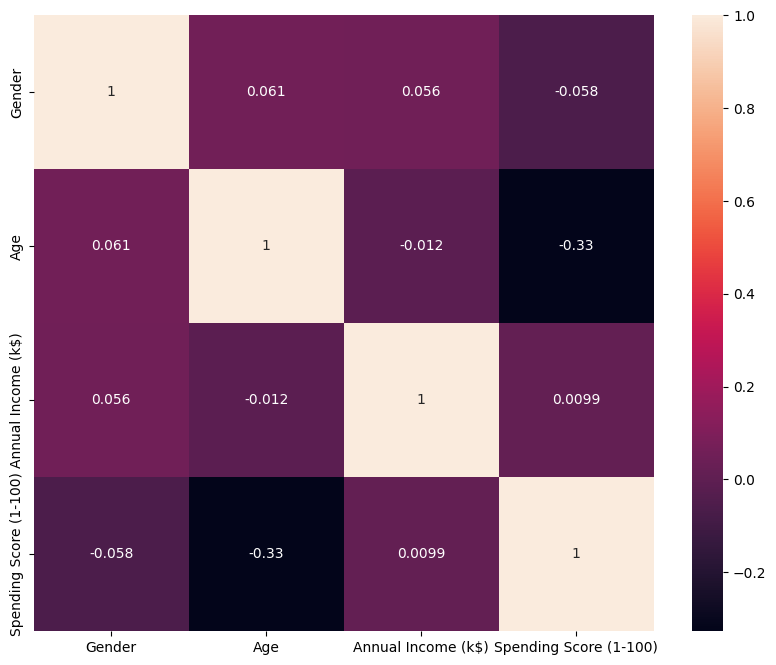

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot =True)

In [16]:
data.corr()['Spending Score (1-100)'].sort_values(ascending= False)

Spending Score (1-100)    1.000000
Annual Income (k$)        0.009903
Gender                   -0.058109
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64

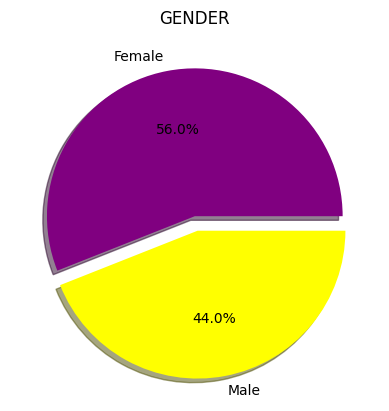

In [17]:
plt.pie(data.Gender.value_counts(),[0,0.1],labels = ['Female','Male'],autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow'],)
plt.title('GENDER')
plt.show()

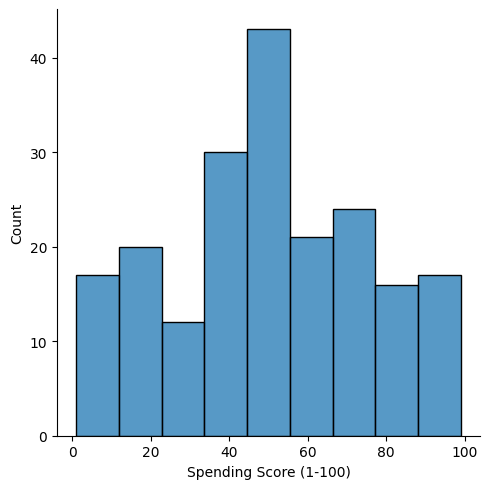

In [18]:
sns.displot(data['Spending Score (1-100)'])

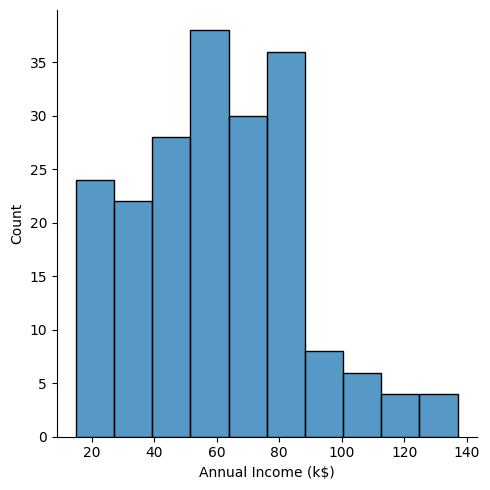

In [19]:
sns.displot(data['Annual Income (k$)'])

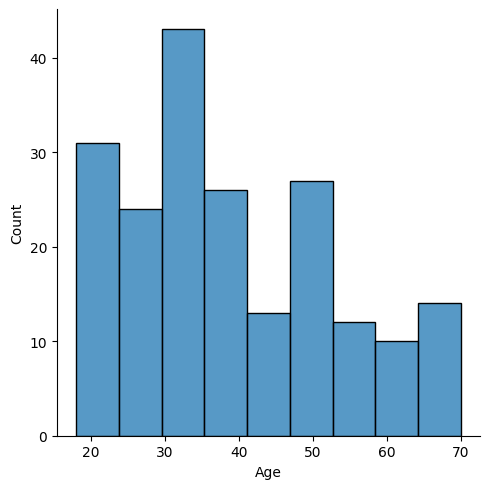

In [20]:
sns.displot(data['Age'])

<Axes: ylabel='Gender'>

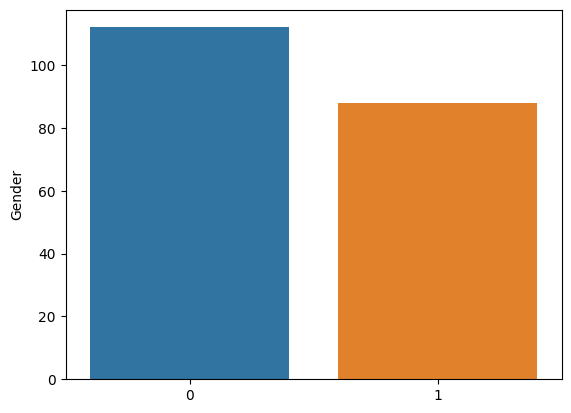

In [21]:
sns.barplot(x =data['Gender'].value_counts().index,y =data['Gender'].value_counts() )

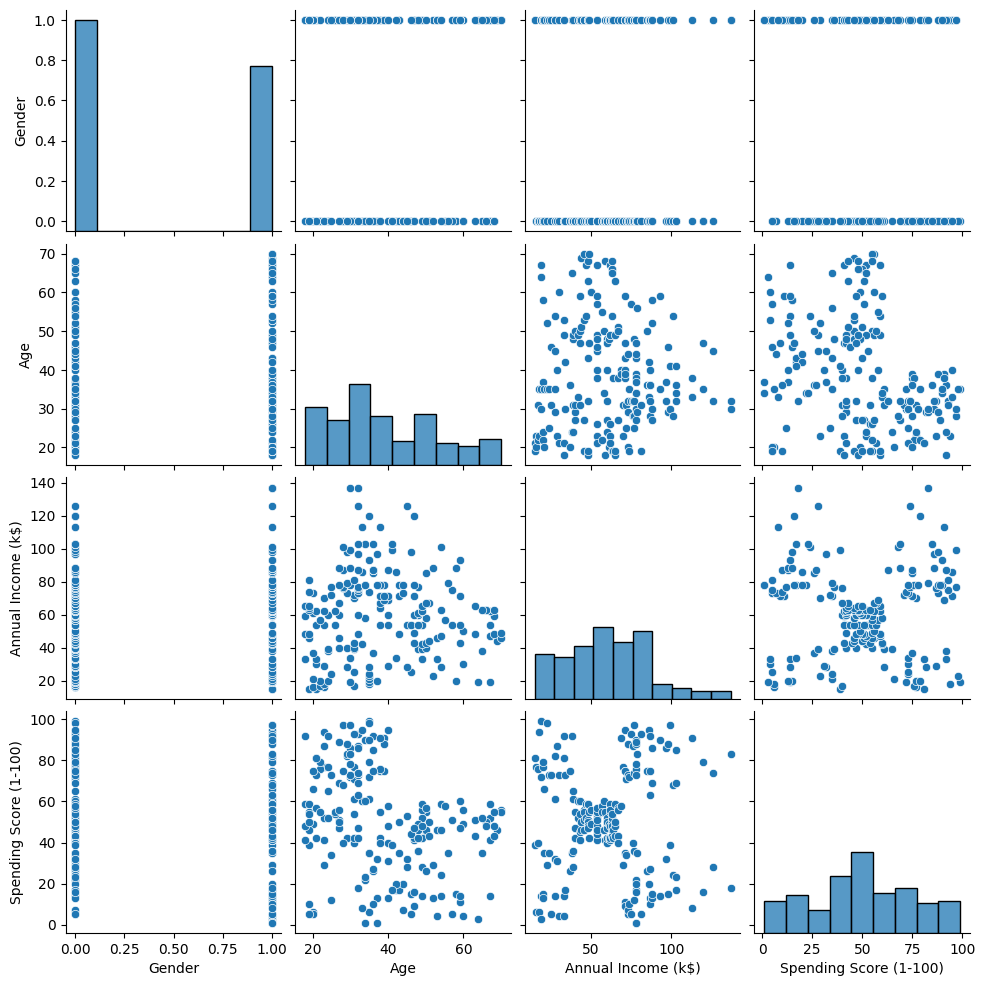

In [22]:
sns.pairplot(data)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

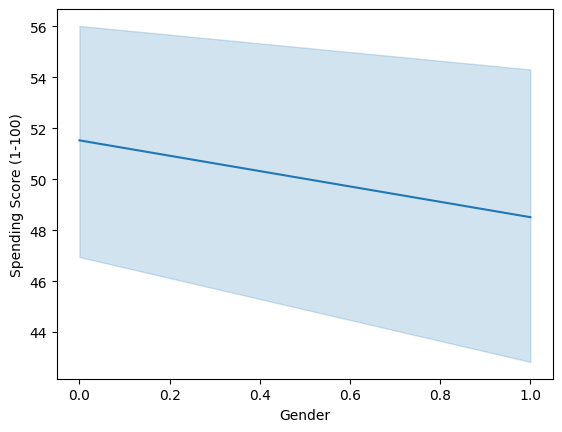

In [23]:
sns.lineplot( x = data['Gender' ] , y = data['Spending Score (1-100)'])

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

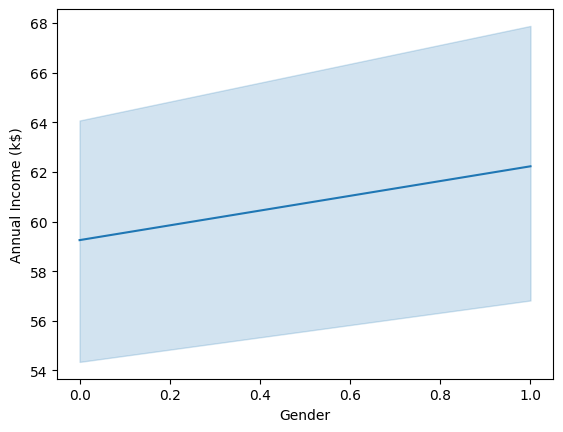

In [24]:
sns.lineplot( x = data['Gender' ] , y = data['Annual Income (k$)'])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

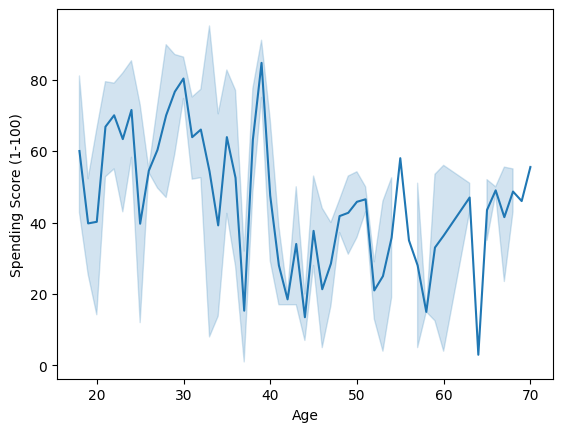

In [25]:
sns.lineplot( x = data['Age' ] , y = data['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

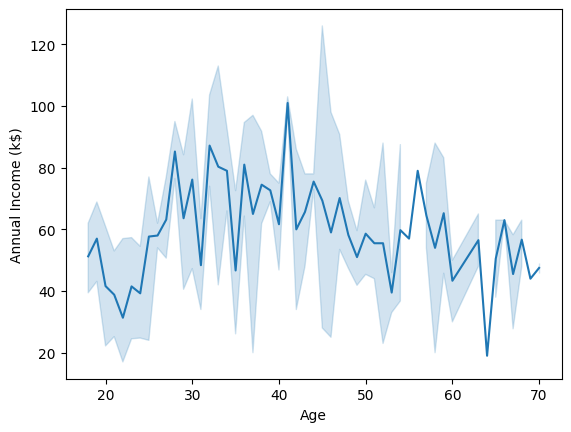

In [26]:
sns.lineplot(x=data['Age'] , y =  data['Annual Income (k$)'])

**Clustering them into the groups**

In [27]:
from sklearn import cluster

error = []
for i in range(2,15):
  kmeans = cluster.KMeans(n_clusters = i)
  kmeans.fit(data)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

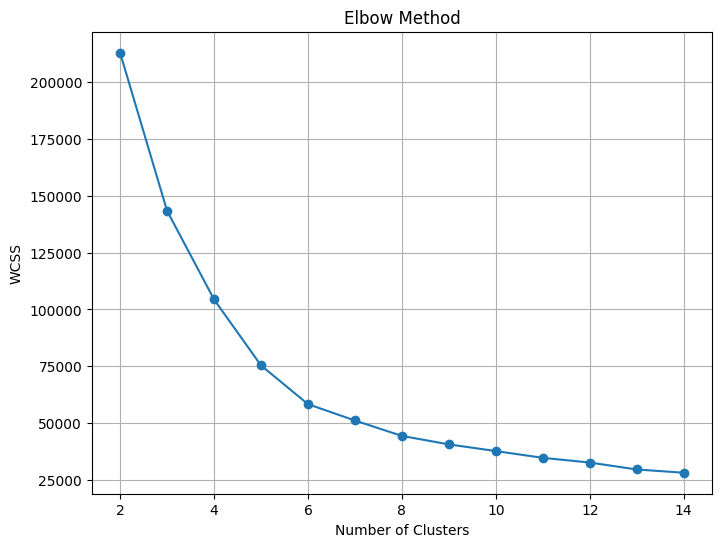

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(range(2,15), error, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [29]:
elbow_point = None
wcss=error
k_values = range(2,15)
for i in range(1, len(wcss)):
    if wcss[i - 1] - wcss[i] < 0.1 * wcss[0]:  # You can adjust the threshold as needed
        elbow_point = k_values[i - 1]
        break

print(f"The estimated elbow point is at {elbow_point} clusters.")

The estimated elbow point is at 5 clusters.


In [30]:
optimal_clusters = 5

kmeans = cluster.KMeans(n_clusters=optimal_clusters)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [31]:
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column to the DataFrame
data['Cluster_Labels'] = cluster_labels

In [32]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Labels
0,1,19,15,39,1
1,1,21,15,81,2
2,0,20,16,6,1
3,0,23,16,77,2
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,4
196,0,45,126,28,3
197,1,32,126,74,4
198,1,32,137,18,3


In [33]:
data['Cluster_Labels'].value_counts()

0    79
4    39
3    36
1    23
2    23
Name: Cluster_Labels, dtype: int64

In [34]:
for i in range(5):
  df = data[data['Cluster_Labels']== i]
  print(df)
  print(" ")
  print(" ")

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster_Labels
46        0   50                  40                      55               0
47        0   27                  40                      47               0
48        0   29                  40                      42               0
49        0   31                  40                      42               0
50        0   49                  42                      52               0
..      ...  ...                 ...                     ...             ...
120       1   27                  67                      56               0
121       0   38                  67                      40               0
122       0   40                  69                      58               0
126       1   43                  71                      35               0
142       0   28                  76                      40               0

[79 rows x 5 columns]
 
 
    Gender  Age  Annual Income (k$)  Spending Sco

***....THANK YOU....***